In [1]:
import numpy as np
import scipy.integrate as spi
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib
import time

import ode_test

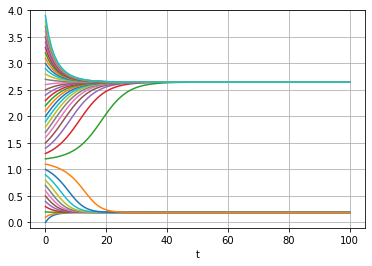

In [2]:
# Carpenter lake euthrophication (parameters from Dakos)

def f(y, t, a, b, r, h):
    return a - b * y + r*(y**2) / (h**2 + y**2)

a = 0.1
b = 0.65
r = 2.5
h = 1.95

t = np.linspace(0, 100, 101)

for y0 in np.arange(0, 4, 0.1):
    sol = spi.odeint(f, y0, t, args=(a, b, r, h))
    plt.plot(t, sol[:, 0])

plt.ylim(-0.1, 4)
plt.xlabel('t')
plt.grid()
plt.show()

In [3]:
# Carpenter lake euthrophication (parameters from Dakos). Countour plot

def f(y, t, a, b, r, h):
    return a - b * y + r*(y**2) / (h**2 + y**2)

a = 0.1


b = 0.65
r = 2.5
h = 1.95

t = np.linspace(0, 100, 101)
df = pd.DataFrame()
aOptions = np.arange(0, 0.3, 0.005)
y0Option = np.arange(0.2, 2.1, 0.05)

for a in aOptions:
    for y0 in y0Option:
        sol = spi.odeint(f, y0, t, args=(a, b, r, h))
        final_state = sol[:, 0][-1]
        df.loc[round(a, 2), round(y0, 1)] = final_state

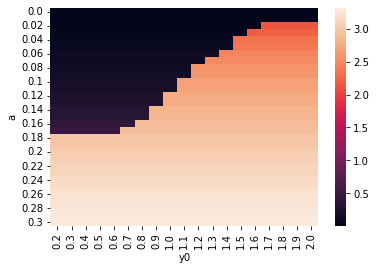

In [4]:
sns.heatmap(df)
plt.xlabel('y0')
plt.ylabel('a')

plt.show()

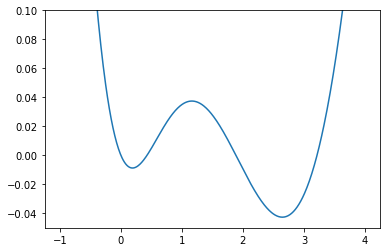

In [5]:
# Potential landscape
a = 0.1
b = 0.65
r = 2.5
h = 1.95

def U(x):
    return (b/2)*(x**2) + h * r * np.arctan(x / h) - (a + r) * x

x = np.arange(-1, 4, 0.01)
plt.plot(x, U(x))

plt.ylim(-0.05, 0.1)
plt.show()

In [6]:
def f_root(x):
    return a - b * x + r*(x**2) / (h**2 + x**2)

a_series = np.arange(0, 0.3, 0.002)
roots_series = []

for a in a_series:
    root = fsolve(f_root, [0.1, 1.3, 2.7])
    roots_series.extend(root)
    
roots_series = np.reshape(roots_series, (3,-1), order='F')

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


first limit point 0.016, second limit point 0.176


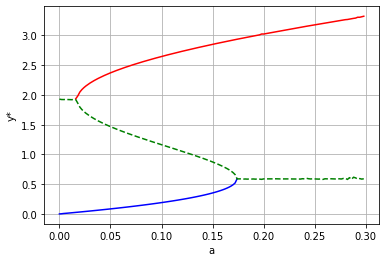

In [7]:
lim0 = 8
lim1 = 88

print(f"first limit point {a_series[lim0]}, second limit point {a_series[88]}")

plt.plot(a_series[lim0:], roots_series[2][lim0:], color='r')
plt.plot(a_series[0:lim1], roots_series[0][0:lim1], color='b')
plt.plot(a_series, roots_series[1], color='g', linestyle='dashed')

plt.xlabel('a')
plt.ylabel('y*')

plt.grid()
plt.show()

## PD implementation

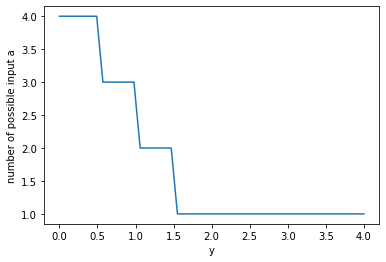

In [8]:
y1=100
y2=0.5
y3=1.0
y4=1.5

def n_strategy(y):
    if y > y4:
        return 1
    elif y > y3:
        return 2
    elif y > y2:
        return 3
    else:
        return 4
    
t = np.linspace(0, 4, 50)
n = [n_strategy(t0) for t0 in t]

plt.xlabel('y')
plt.ylabel('number of possible input a')
plt.plot(t, n)
plt.show()

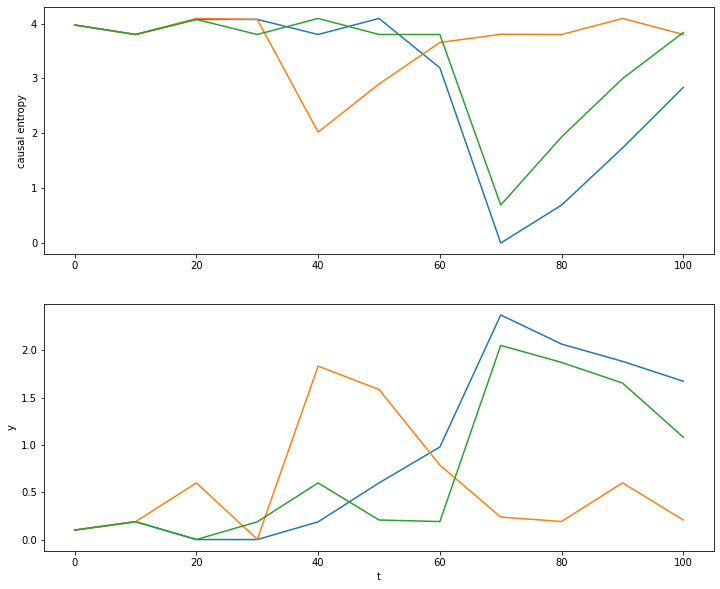

In [9]:
n_scenarious = 1
step = 10
time_limit = 4

t_max = 100
y0 = 0.1

a = 0.1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))


for i in range(3):
    s_final, y_final = ode_test.run_scenarios(t_max, y0, a, n_scenarious, step, time_limit)
    t_final = np.arange(0, t_max + step, step)

    ax1.plot(t_final, s_final)
    ax2.plot(t_final, y_final)

ax2.set_ylabel('y')
ax1.set_ylabel('causal entropy')
plt.xlabel('t')

plt.show()

In [10]:
n_scenarious = 50
step = 10
time_limit = 4


t_max = 100
y0 = 0.1

a = 0.1
t_final = np.arange(0, t_max + step, step)
y0_options = [0, 0.5, 1.0, 1.5, 2.0]

s_final = []
y_final = []

for y0 in y0_options:
    s, y = ode_test.run_scenarios(t_max, y0, a, n_scenarious, step, time_limit)
    
    s_final.append(s)
    y_final.append(y)


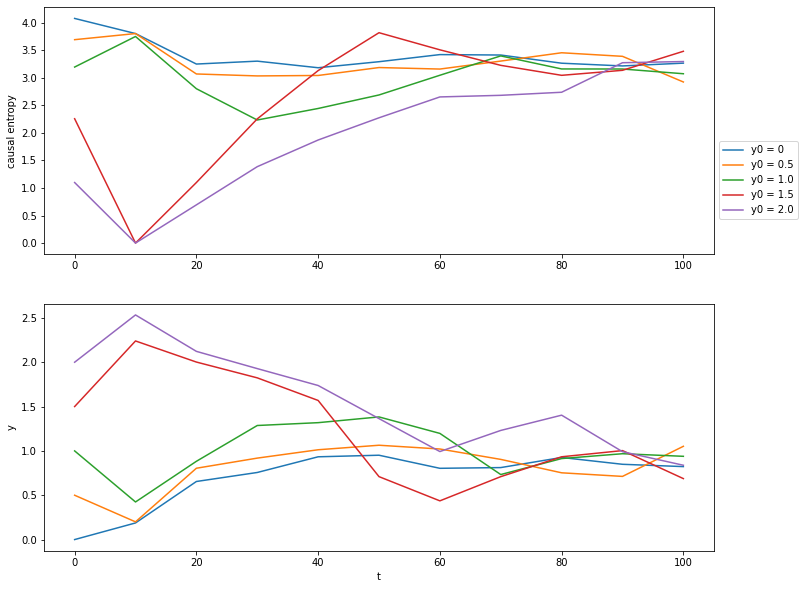

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

for i in range(len(y0_options)):
    ax1.plot(t_final, s_final[i])
    ax2.plot(t_final, y_final[i], label=f"y0 = {y0_options[i]}")

plt.legend(loc='center left', bbox_to_anchor=(1, 1.5))
ax2.set_ylabel('y')
ax1.set_ylabel('causal entropy')
plt.xlabel('t')

plt.show()

In [12]:
n_scenarious = 50
step = 5
time_limit = 4

t_max = 100
y0 = 0.1

a = 0.1
t_final = np.arange(0, t_max + step, step)
y0_options = [0, 0.5, 1.0, 1.5, 2.0]

s_final = []
y_final = []

for y0 in y0_options:
    s, y = ode_test.run_scenarios(t_max, y0, a, n_scenarious, step, time_limit)
    
    s_final.append(s)
    y_final.append(y)


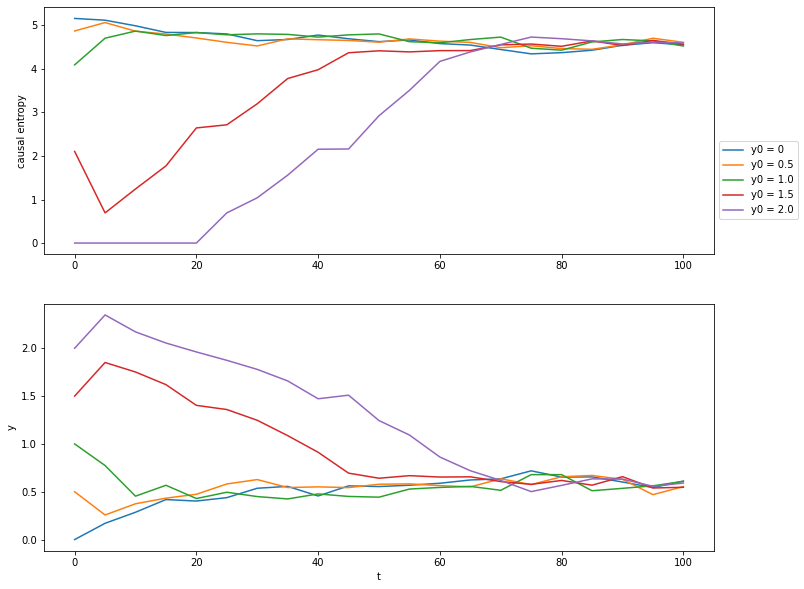

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

for i in range(len(y0_options)):
    ax1.plot(t_final, s_final[i])
    ax2.plot(t_final, y_final[i], label=f"y0 = {y0_options[i]}")

plt.legend(loc='center left', bbox_to_anchor=(1, 1.5))
ax2.set_ylabel('y')
ax1.set_ylabel('causal entropy')
plt.xlabel('t')

plt.show()

## Fixed starting point

In [14]:
importlib.reload(ode_test)

n_scenarious = 1
#step = 10
#time_limit = 4
y0 = 0.1
a = 0.1
t_max = 0

time_limit_options0 = [1, 3, 6, 10]
step_options0 = [5, 10, 20]

s_final0 = []

for step in step_options0:
    s_final0.append([])
    for time_limit in time_limit_options0:
        
        start = time.time()
        print(f"step = {step}, time_limit = {time_limit}")
        s, _ = ode_test.run_scenarios(t_max, y0, a, n_scenarious, step, time_limit)
        end = time.time()
        print('Finished', end - start)
        
        s_final0[-1].append(s[0])


step = 5, time_limit = 1
Finished 0.0025320053100585938
step = 5, time_limit = 3
Finished 0.03416800498962402
step = 5, time_limit = 6
Finished 0.3328080177307129
step = 5, time_limit = 10
Finished 50.67710280418396
step = 10, time_limit = 1
Finished 0.0005002021789550781
step = 10, time_limit = 3
Finished 0.008336544036865234
step = 10, time_limit = 6
Finished 0.23792743682861328
step = 10, time_limit = 10
Finished 19.86286997795105
step = 20, time_limit = 1
Finished 0.0006430149078369141
step = 20, time_limit = 3
Finished 0.012063741683959961
step = 20, time_limit = 6
Finished 0.2720458507537842
step = 20, time_limit = 10
Finished 17.856993436813354


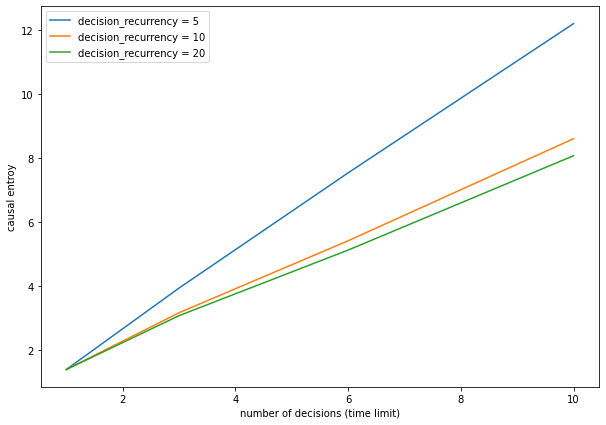

In [15]:
plt.figure(figsize=(10, 7))

for i in range(len(step_options0)):
    plt.plot(time_limit_options0, s_final0[i], label=f"decision_recurrency = {step_options0[i]}")
    
plt.legend()
plt.ylabel('causal entroy')
plt.xlabel('number of decisions (time limit)')
plt.show()

In [16]:
importlib.reload(ode_test)

n_scenarious = 1
step = 10
#time_limit = 4
#y0 = 0.1
a = 0.1
t_max = 0

time_limit_options1 = [1, 3, 6, 10]
y0_options1 = [0, 0.1, 0.2, 0.3, 0.4]

s_final1 = []

for y0 in y0_options1:
    s_final1.append([])
    for time_limit in time_limit_options1:
        print(f"step = {step}, time_limit = {time_limit}")
        s, _ = ode_test.run_scenarios(t_max, y0, a, n_scenarious, step, time_limit)
        
        s_final1[-1].append(s[0])


step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10


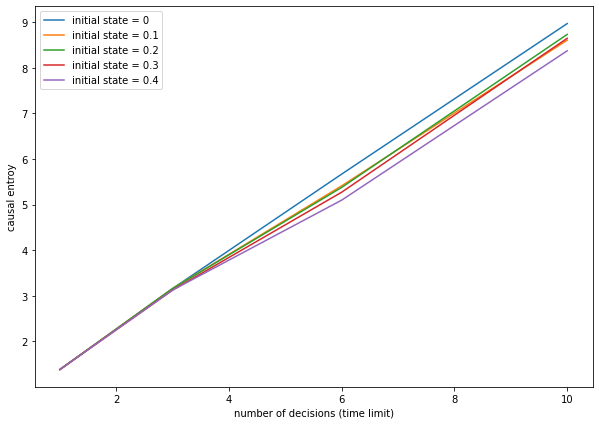

In [17]:
plt.figure(figsize=(10, 7))

for i in range(len(y0_options1)):
    plt.plot(time_limit_options1, s_final1[i], label=f"initial state = {y0_options1[i]}")
    
plt.legend()
plt.ylabel('causal entroy')
plt.xlabel('number of decisions (time limit)')
plt.show()

In [18]:
importlib.reload(ode_test)

n_scenarious = 1
step = 10
#time_limit = 4
#y0 = 0.1
a = 0.1
t_max = 0

time_limit_options2 = [1, 3, 6, 10]
y0_options2 = [0, 0.25, 0.5, 0.75, 1.0, 1.5, 1.75]

s_final2 = []

for y0 in y0_options2:
    s_final2.append([])
    for time_limit in time_limit_options2:
        print(f"step = {step}, time_limit = {time_limit}")
        s, _ = ode_test.run_scenarios(t_max, y0, a, n_scenarious, step, time_limit)
        
        s_final2[-1].append(s[0])


step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10
step = 10, time_limit = 1
step = 10, time_limit = 3
step = 10, time_limit = 6
step = 10, time_limit = 10


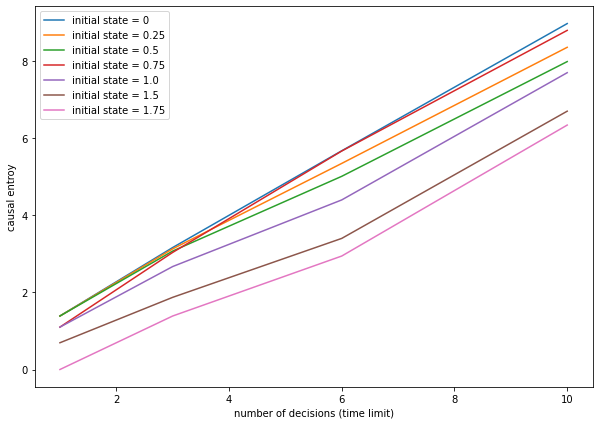

In [19]:
plt.figure(figsize=(10, 7))

for i in range(len(y0_options2)):
    plt.plot(time_limit_options2, s_final2[i], label=f"initial state = {y0_options2[i]}")
    
plt.legend()
plt.ylabel('causal entroy')
plt.xlabel('number of decisions (time limit)')
plt.show()